In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import time
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(r'C:\Users\sreej\Downloads\final.csv')
df.head()

ID  Age_in_months  Year  Gaze_pattern_on_faces_%  Joint_attention_%  \
0   1             19     2                77.522772          62.118371   
1   2              7     3                23.261133          64.441362   
2   3             17     5                86.283868          85.371466   
3   4             14     3                42.600236          16.141282   
4   5              7     5                77.553285          11.244451   

   Babbling_frequency_per_min  Response_to_name_%  Heart_rate_variability_ms  \
0                    5.090718           90.593364                  53.852921   
1                    6.355008           84.337035                  20.934933   
2                   15.279446            6.541748                  36.155330   
3                    5.395966           52.937950                  47.578181   
4                   12.323692           26.787210                  65.080223   

   Sleep_duration_hrs_per_night  Social_engagement_%  ...  \
0                      7.421609            35.330578  ...   
1                      8.941689            73.470072  ...   
2                     11.836876            77.592020  ...   
3                      9.518953            87.759194  ...   
4                      5.396740            27.587994  ...   

   Cognitive_development_score Emotional_regulation_score  \
0                    57.413693                  65.079307   
1                    93.099827                  82.139043   
2                    80.008693                  88.773509   
3                   110.829339                  43.013778   
4                   106.217124                  97.975699   

   Repetitive_behavior_frequency  Eye_contact_duration_secs  \
0                             12                   4.204673   
1                             12                   2.073481   
2                              0                   4.594450   
3                             12                   1.334504   
4                             19                   1.994742   

   Engagement_in_play_%  Stress_response_score  Reaction_time_to_cues_secs  \
0             71.219320              86.605857                    0.601293   
1             67.347276              98.197596                    2.634384   
2             62.643476              10.335831                    2.363356   
3             46.560441              92.852792                    2.084212   
4             19.202238               1.765710                    2.251962   

   Behavioral_anomalies_%  Adaptability_score Parental_concern_flag  
0               18.291992           12.662929                     0  
1               14.413140           39.192314                     0  
2               69.986084           80.697262                     0  
3               30.557791           64.698039                     0  
4               75.545220           89.305883                     0  

[5 rows x 30 columns]

In [3]:
categorical_features = [
    'Sensory_sensitivity_level',
    'Auditory_sensitivity_level'
]

numerical_features = [
    'Age_in_months',
    'Gaze_pattern_on_faces_%',
    'Joint_attention_%',
    'Babbling_frequency_per_min',
    'Response_to_name_%',
    'Heart_rate_variability_ms',
    'Sleep_duration_hrs_per_night',
    'Social_engagement_%',
    'Motor_milestone_delay_months',
    'Parent_interaction_score',
    'Fine_motor_skills_score',
    'Gross_motor_skills_score',
    'Eye_tracking_latency_ms',
    'Response_to_visual_stimuli_%',
    'Language_comprehension_score',
    'Speech_delay_months',
    'Cognitive_development_score',
    'Emotional_regulation_score',
    'Repetitive_behavior_frequency',
    'Eye_contact_duration_secs',
    'Engagement_in_play_%',
    'Stress_response_score',
    'Reaction_time_to_cues_secs',
    'Behavioral_anomalies_%',
    'Adaptability_score'
]

exclude_features = ['ID', 'Year']

# Target variable
target_variable = 'Parental_concern_flag'


print("Dataset Basic Information:")
print(df.info())

print(f"Number of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")
print(f"Excluded features: {exclude_features}")

Dataset Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             50000 non-null  int64  
 1   Age_in_months                  50000 non-null  int64  
 2   Year                           50000 non-null  int64  
 3   Gaze_pattern_on_faces_%        50000 non-null  float64
 4   Joint_attention_%              50000 non-null  float64
 5   Babbling_frequency_per_min     50000 non-null  float64
 6   Response_to_name_%             50000 non-null  float64
 7   Heart_rate_variability_ms      50000 non-null  float64
 8   Sleep_duration_hrs_per_night   50000 non-null  float64
 9   Social_engagement_%            50000 non-null  float64
 10  Motor_milestone_delay_months   50000 non-null  int64  
 11  Sensory_sensitivity_level      50000 non-null  object 
 12  Parent_interaction_

In [4]:
print(df[numerical_features].describe())

       Age_in_months  Gaze_pattern_on_faces_%  Joint_attention_%  \
count   50000.000000             50000.000000       50000.000000   
mean       14.504940                49.977053          50.094149   
std         5.185549                23.114524          25.967262   
min         6.000000                10.002003           5.000099   
25%        10.000000                30.048077          27.659500   
50%        14.000000                49.912314          50.057991   
75%        19.000000                70.008560          72.555998   
max        23.000000                89.994719          94.999365   

       Babbling_frequency_per_min  Response_to_name_%  \
count                50000.000000        50000.000000   
mean                    10.025881           49.815034   
std                      5.785763           28.804229   
min                      0.000103            0.000222   
25%                      5.028092           24.912569   
50%                     10.023782           4

In [5]:
print("\nDistribution of categorical features:")
for cat_feat in categorical_features:
    print(f"\n{cat_feat} value counts:")
    print(df[cat_feat].value_counts(normalize=True))


Distribution of categorical features:

Sensory_sensitivity_level value counts:
Sensory_sensitivity_level
Low       0.33474
High      0.33352
Normal    0.33174
Name: proportion, dtype: float64

Auditory_sensitivity_level value counts:
Auditory_sensitivity_level
High      0.33470
Low       0.33274
Normal    0.33256
Name: proportion, dtype: float64


In [6]:
print("\nTarget variable distribution:")
print(df[target_variable].value_counts(normalize=True))


Target variable distribution:
Parental_concern_flag
0    0.80178
1    0.19822
Name: proportion, dtype: float64


Generating pair plot of key features...


<Figure size 1500x1500 with 0 Axes>

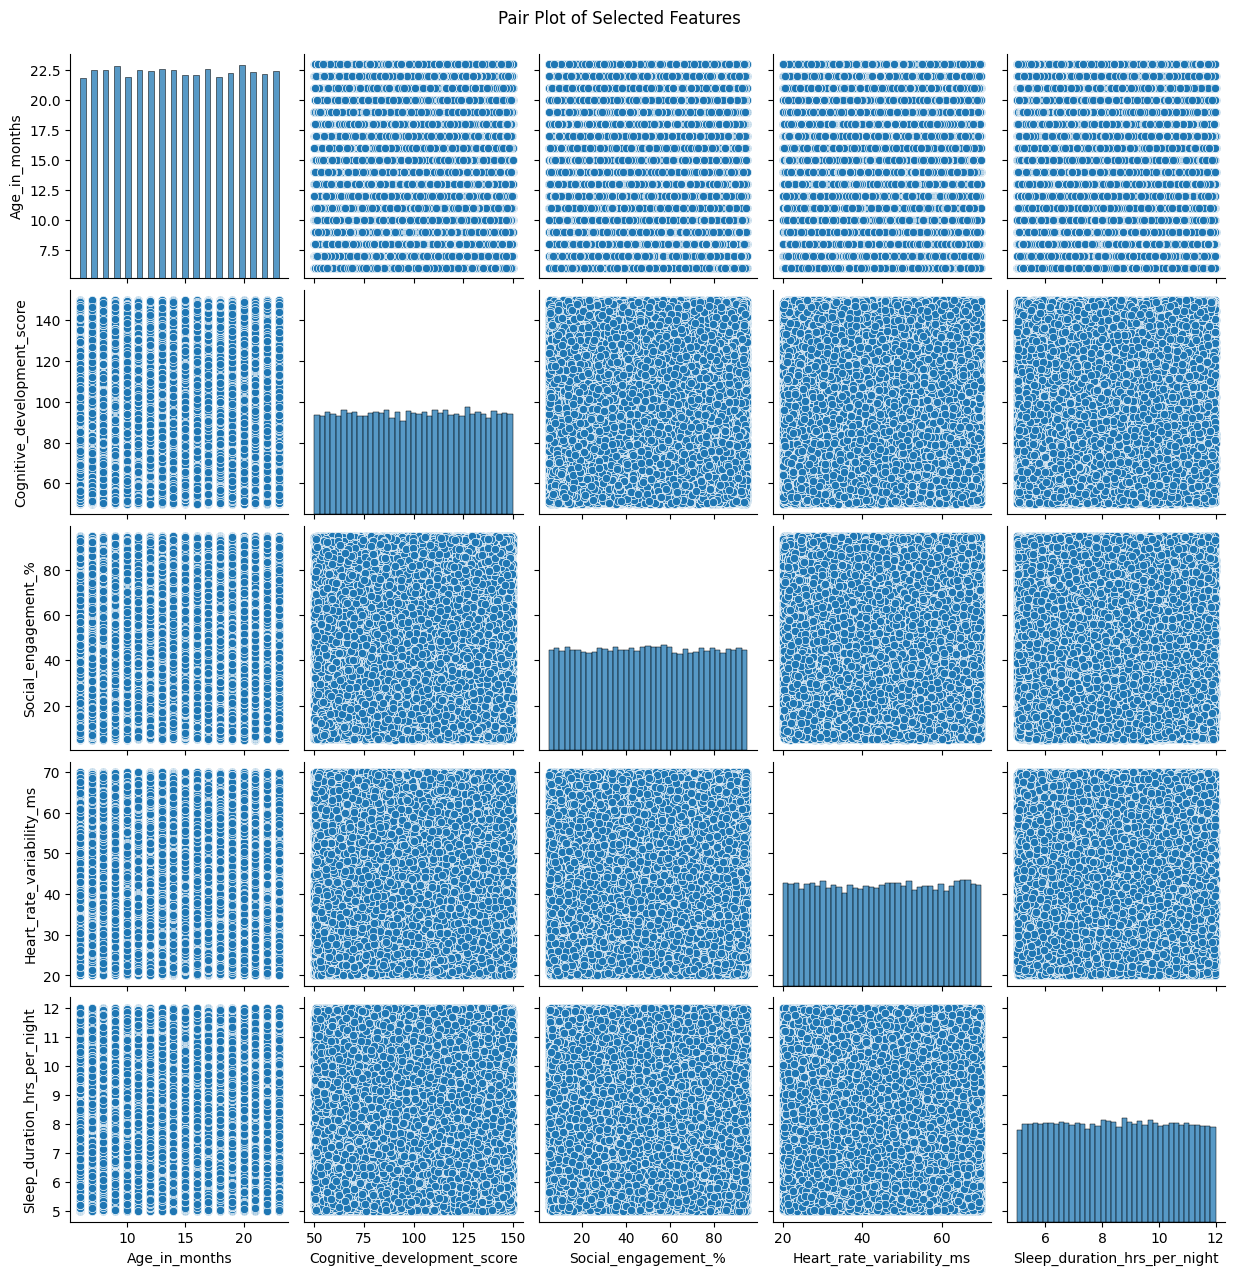

In [7]:
# Exploratory Data Analysis (EDA)

print("Generating pair plot of key features...")
plt.figure(figsize=(15, 15))
sns.pairplot(df[['Age_in_months', 'Cognitive_development_score', 'Social_engagement_%',
                 'Heart_rate_variability_ms', 'Sleep_duration_hrs_per_night']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


Generating correlation heatmap...


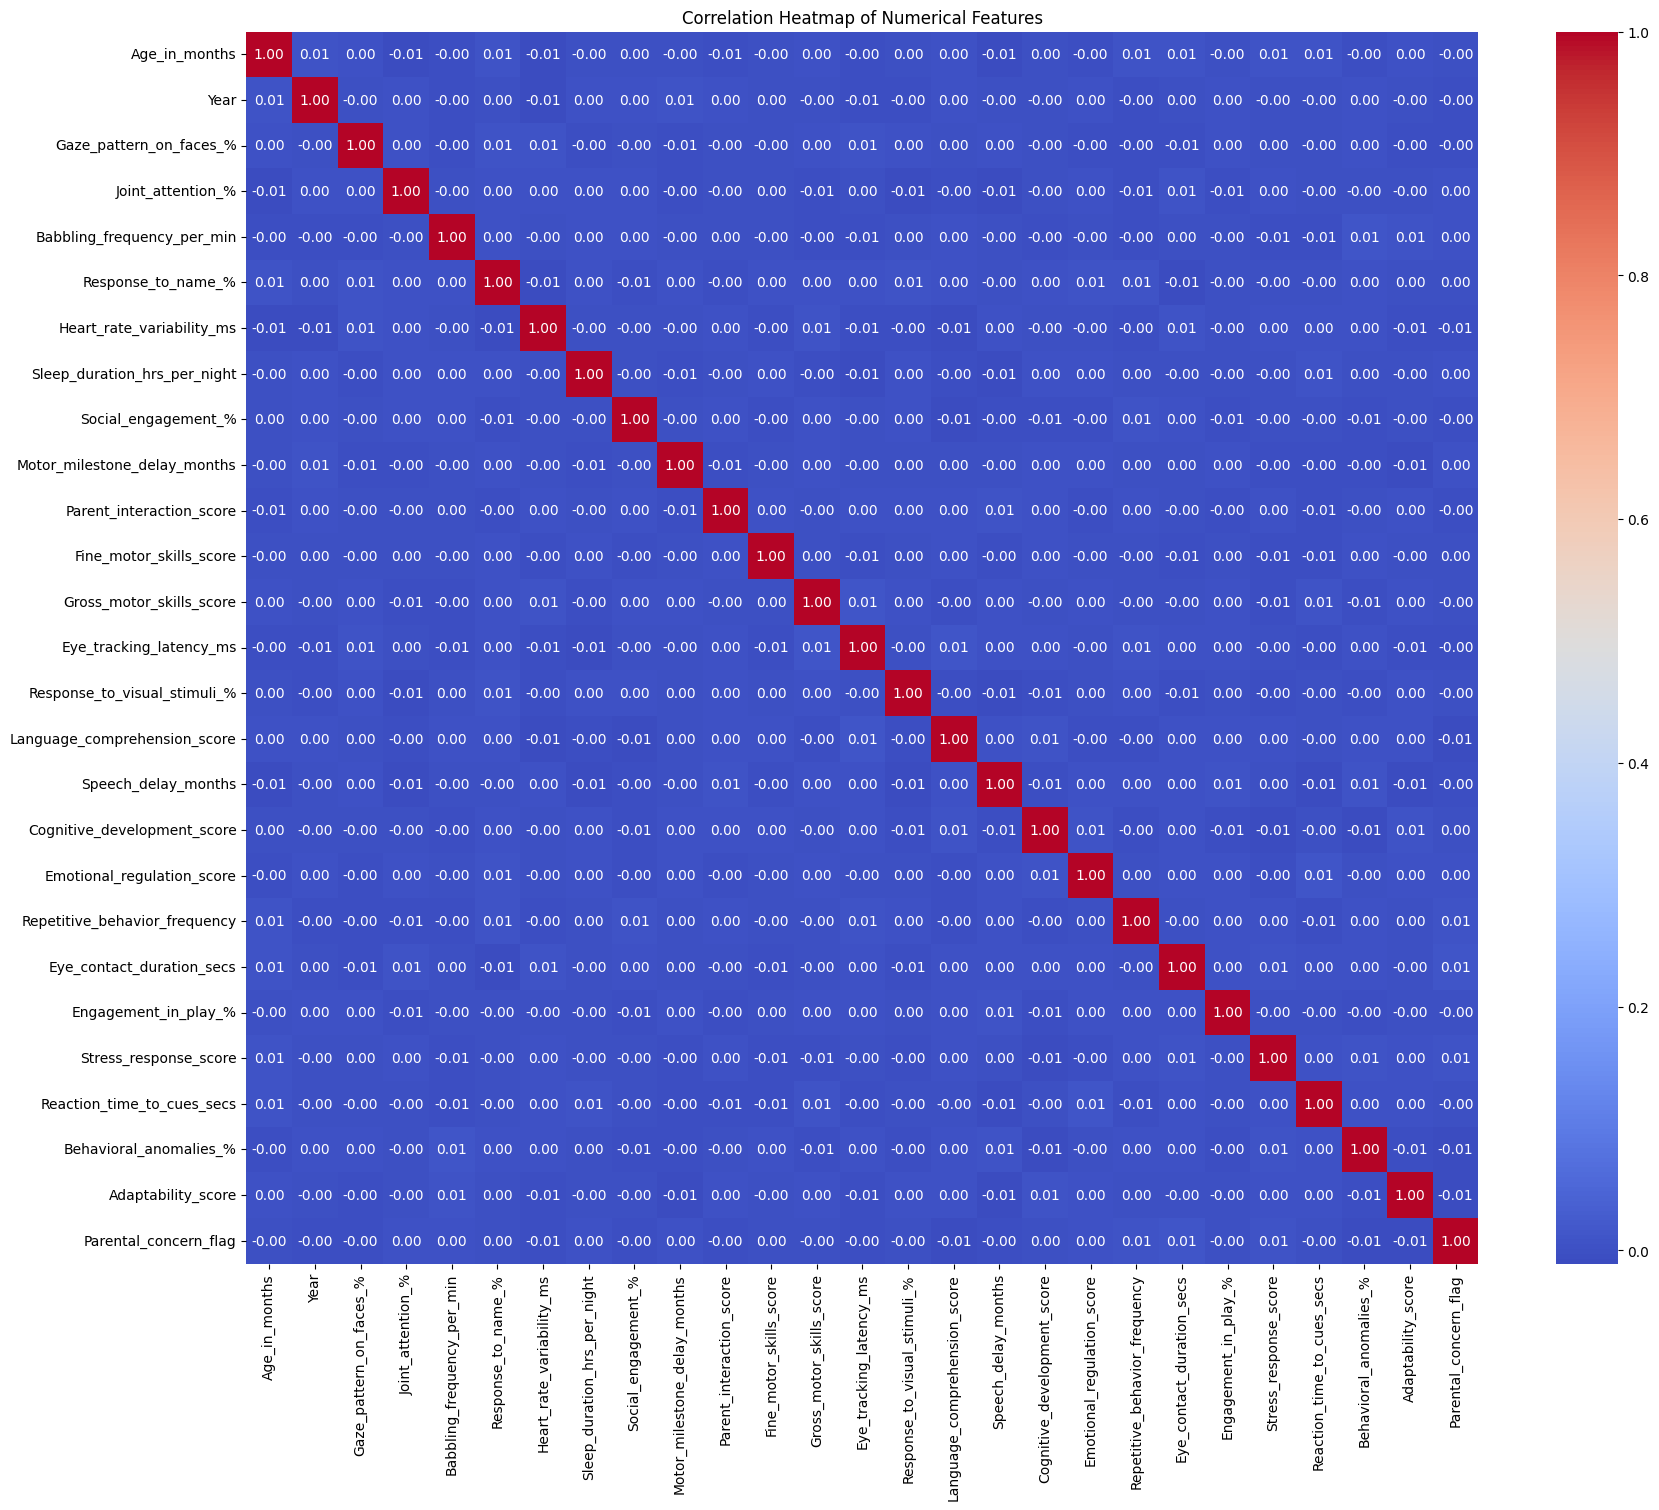

In [8]:
print("\nGenerating correlation heatmap...")

numeric_columns = df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop(columns=['ID'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [9]:
# Part 3: Age-based Analysis
print("\nCalculating age-based statistics...")
# Group by Age_in_months and calculate means
grouped_means = numeric_columns.groupby(df['Age_in_months']).mean()
print("\nAge-grouped means for numeric features:")
print(grouped_means)


Calculating age-based statistics...

Age-grouped means for numeric features:
               Age_in_months      Year  Gaze_pattern_on_faces_%  \
Age_in_months                                                     
6                        6.0  3.031923                49.885854   
7                        7.0  2.967477                50.000797   
8                        8.0  2.963890                50.157652   
9                        9.0  2.967505                49.934313   
10                      10.0  2.915712                50.091000   
11                      11.0  3.043261                49.707272   
12                      12.0  2.962419                50.608661   
13                      13.0  3.015275                49.505737   
14                      14.0  2.993922                49.482014   
15                      15.0  3.013553                49.656138   
16                      16.0  2.979113                49.696873   
17                      17.0  3.034030             


Age-grouped modes for categorical features:
              Sensory_sensitivity_level Auditory_sensitivity_level
Age_in_months                                                     
6                                  High                       High
7                                  High                       High
8                                Normal                        Low
9                                   Low                     Normal
10                                  Low                     Normal
11                               Normal                       High
12                                  Low                       High
13                               Normal                        Low
14                                 High                     Normal
15                                  Low                     Normal
16                                  Low                       High
17                                  Low                       High
18               

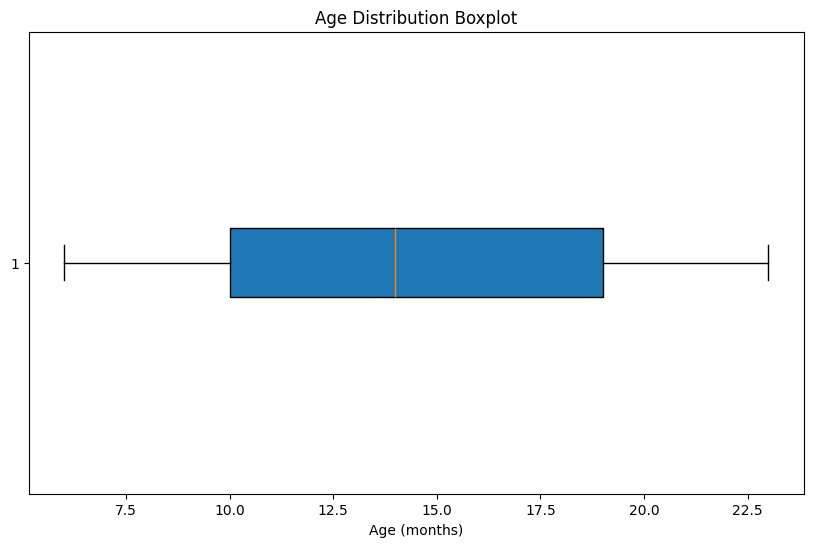

In [10]:
categorical_columns = df.select_dtypes(include=['object'])
print("\nAge-grouped modes for categorical features:")
print(categorical_columns.groupby(df['Age_in_months']).agg(lambda x: x.mode()[0]))


plt.figure(figsize=(10, 6))
plt.boxplot(df['Age_in_months'], vert=False, patch_artist=True)
plt.title('Age Distribution Boxplot')
plt.xlabel('Age (months)')
plt.show()

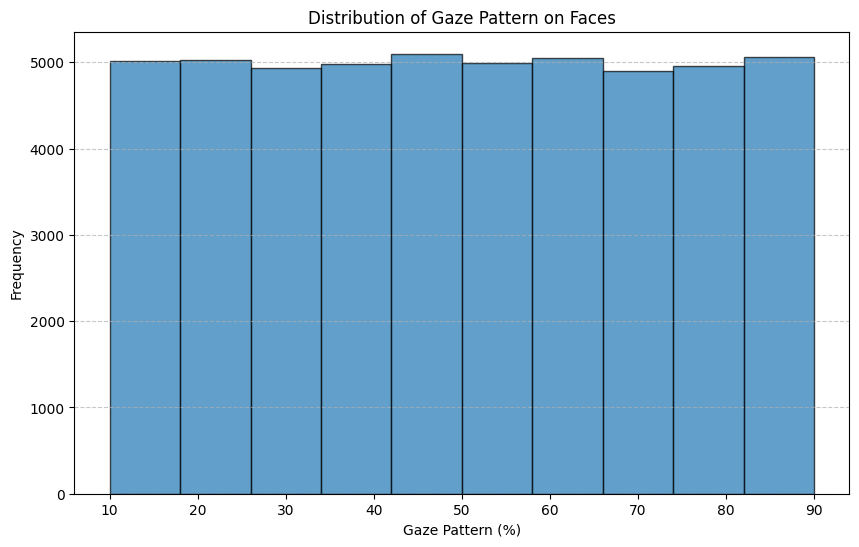

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['Gaze_pattern_on_faces_%'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Gaze Pattern on Faces')
plt.xlabel('Gaze Pattern (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

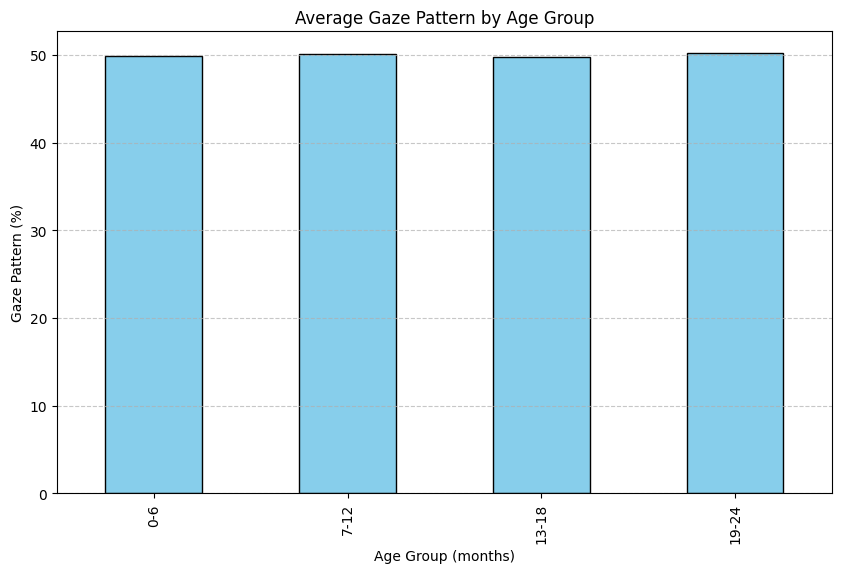

In [12]:
age_bins = pd.cut(df['Age_in_months'], bins=[0, 6, 12, 18, 24], 
                 labels=['0-6', '7-12', '13-18', '19-24'])

gaze_means = df.groupby(age_bins)['Gaze_pattern_on_faces_%'].mean()
plt.figure(figsize=(10, 6))
gaze_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Gaze Pattern by Age Group')
plt.xlabel('Age Group (months)')
plt.ylabel('Gaze Pattern (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

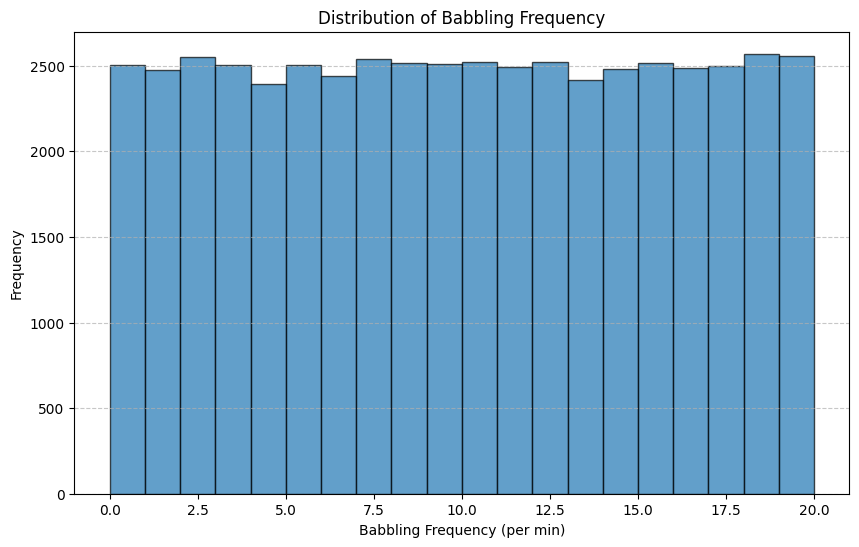

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Babbling_frequency_per_min'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Babbling Frequency')
plt.xlabel('Babbling Frequency (per min)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

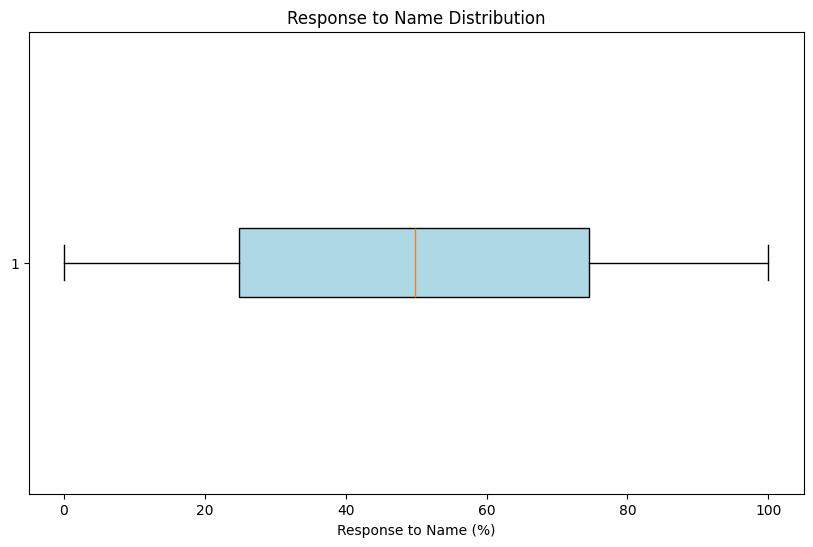

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Response_to_name_%'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'))
plt.title('Response to Name Distribution')
plt.xlabel('Response to Name (%)')
plt.show()

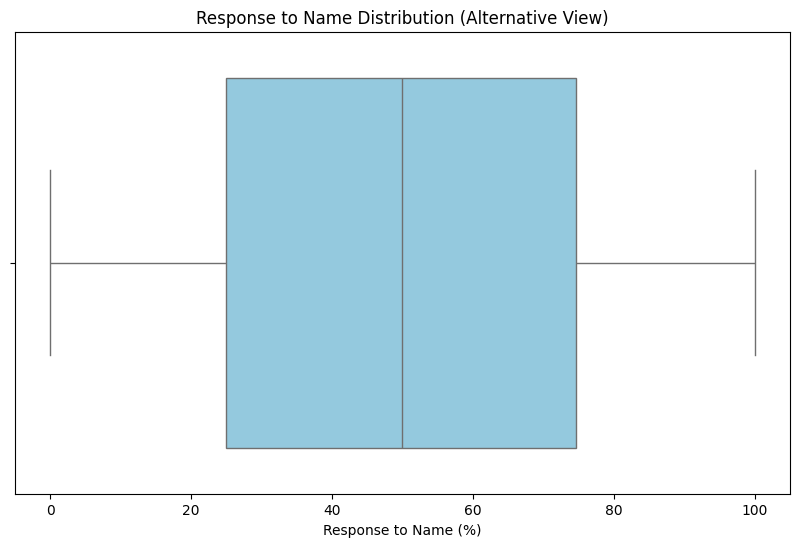

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Response_to_name_%'], color='skyblue')
plt.title('Response to Name Distribution (Alternative View)')
plt.xlabel('Response to Name (%)')
plt.show()

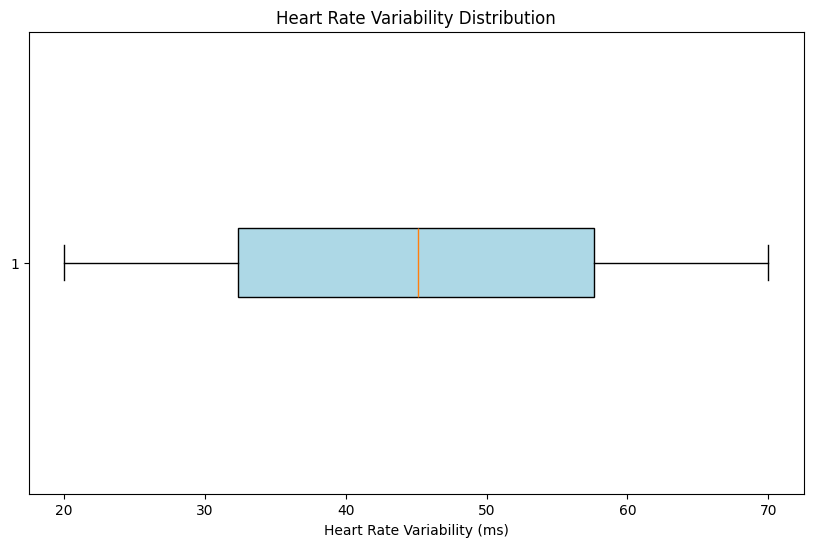

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Heart_rate_variability_ms'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'))
plt.title('Heart Rate Variability Distribution')
plt.xlabel('Heart Rate Variability (ms)')
plt.show()

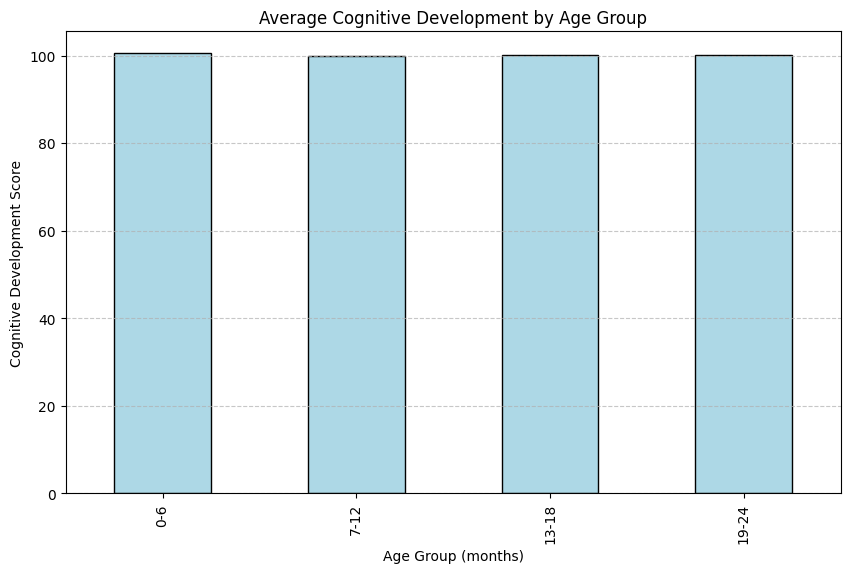

In [17]:
cognitive_means = df.groupby(age_bins)['Cognitive_development_score'].mean()
plt.figure(figsize=(10, 6))
cognitive_means.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Cognitive Development by Age Group')
plt.xlabel('Age Group (months)')
plt.ylabel('Cognitive Development Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Generating trend analysis plots...


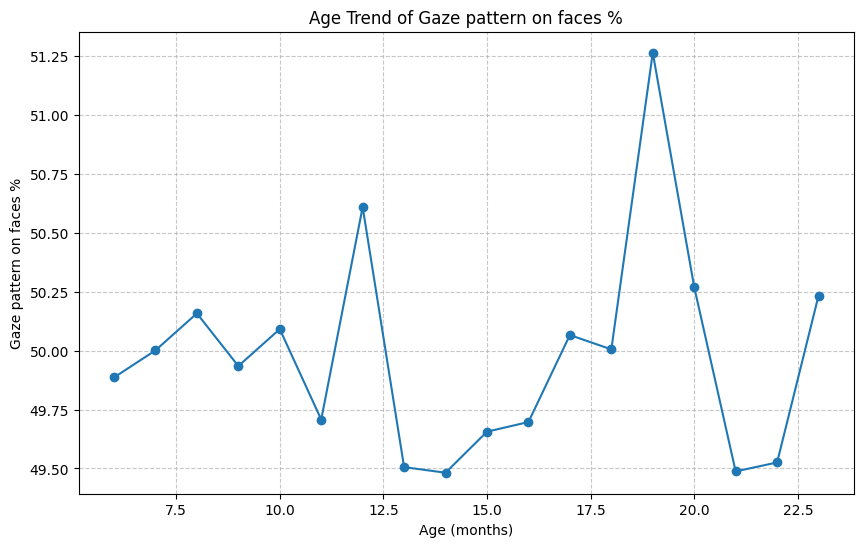

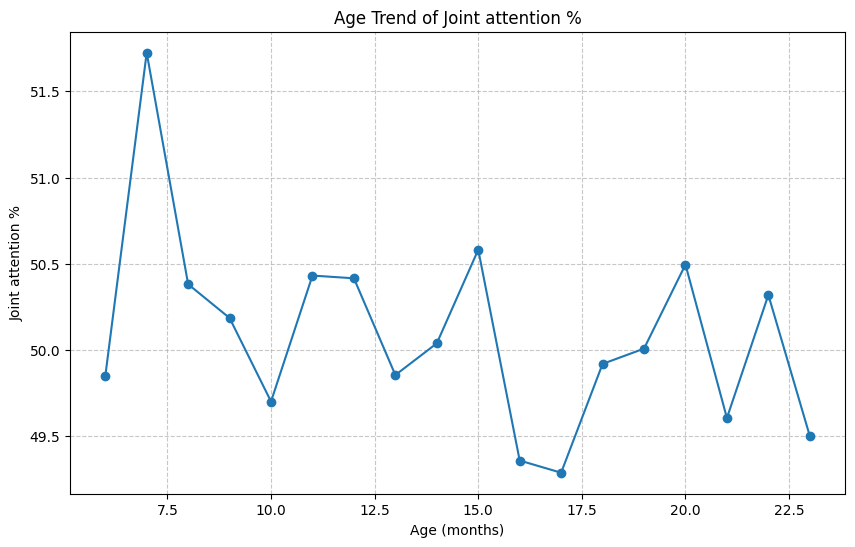

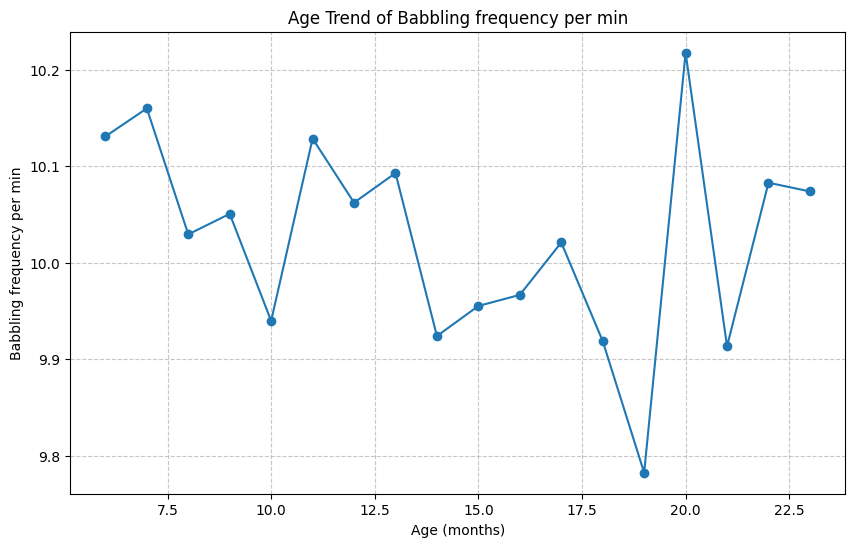

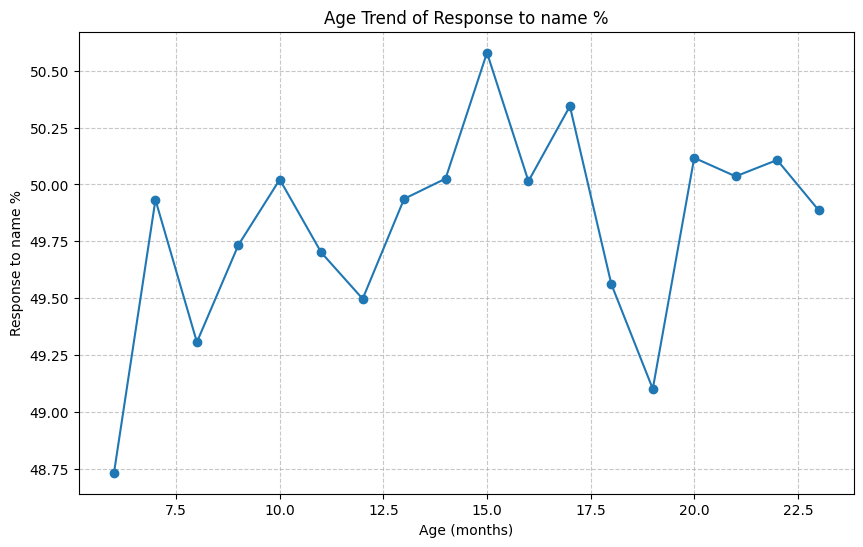

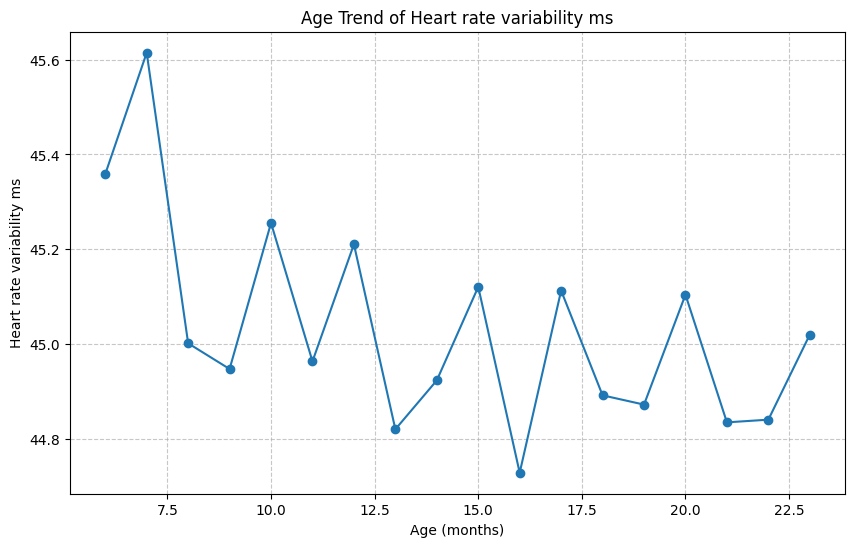

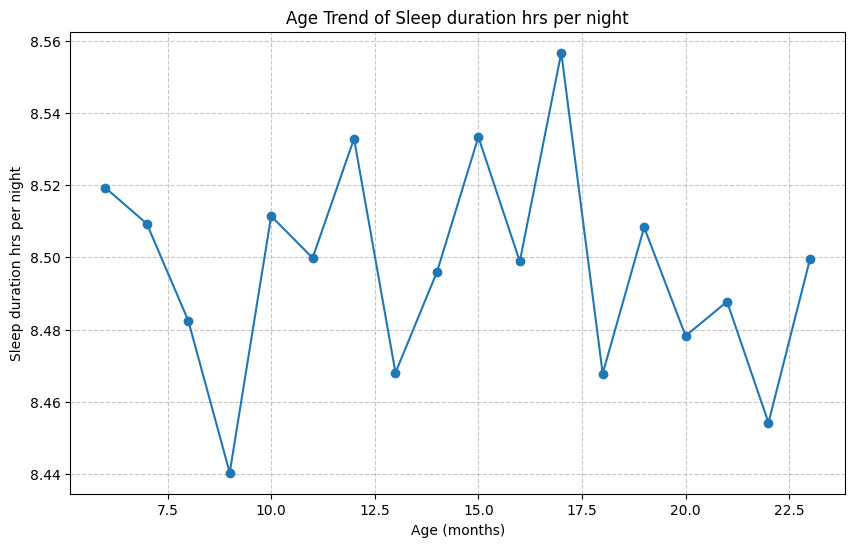

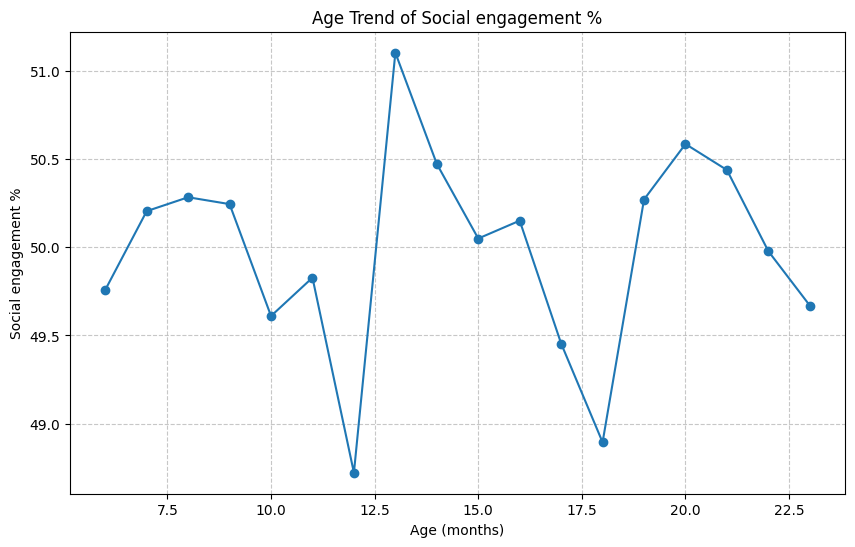

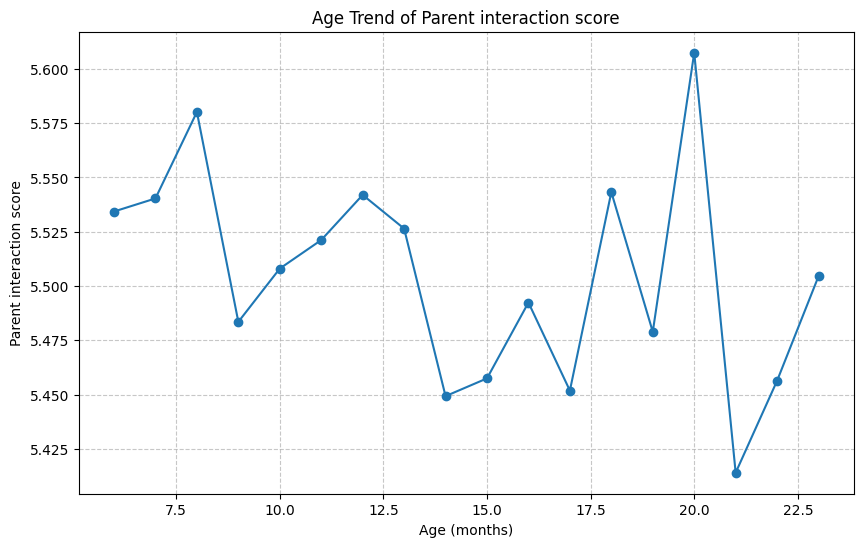

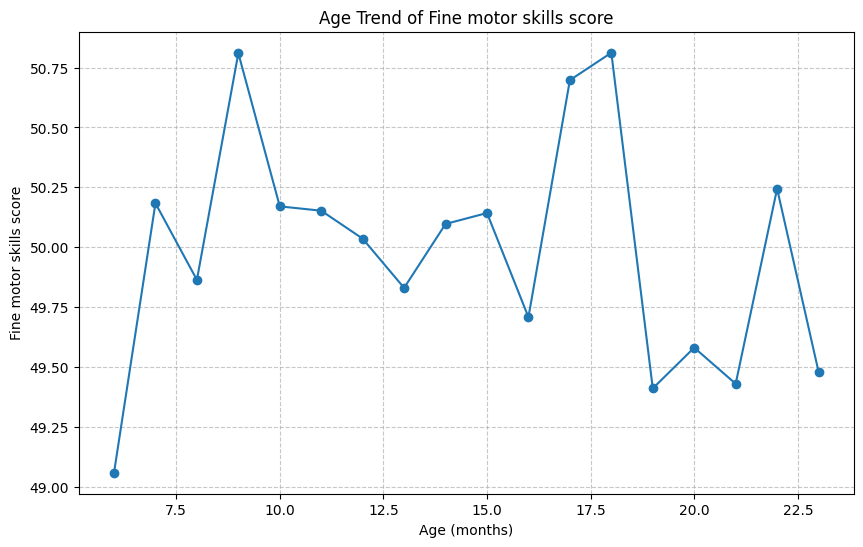

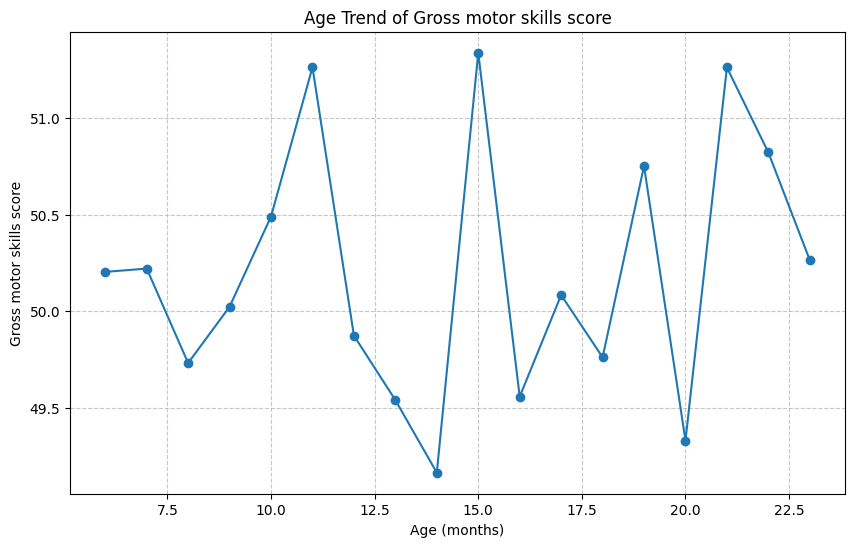

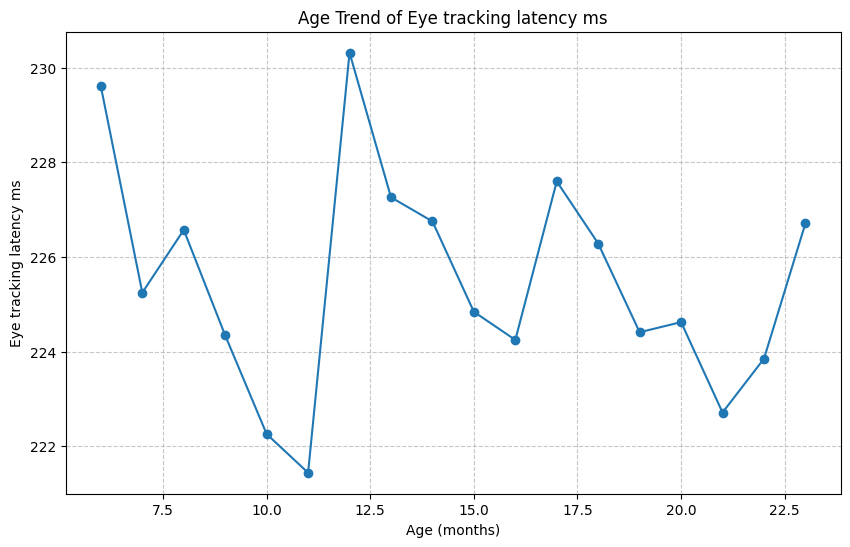

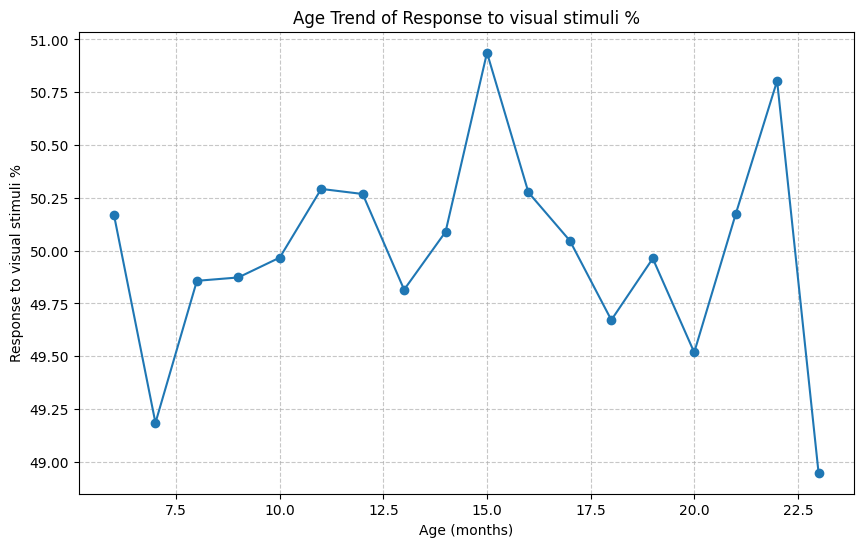

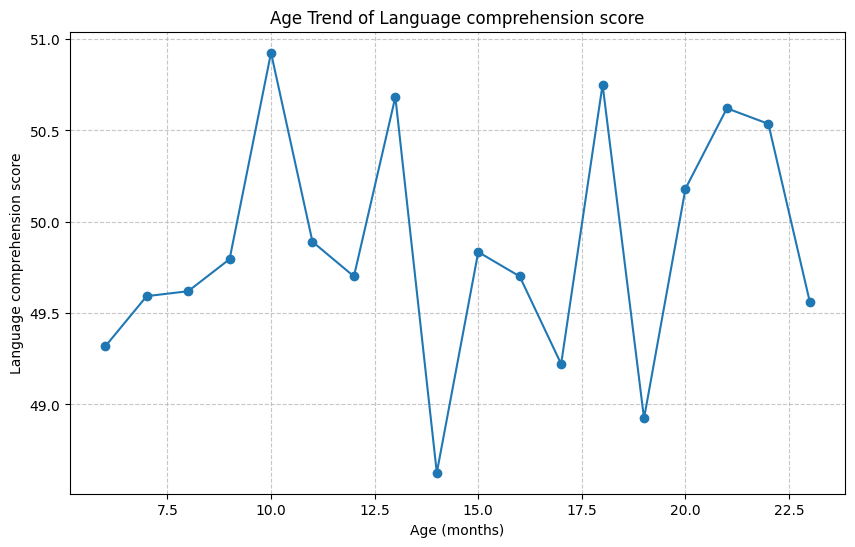

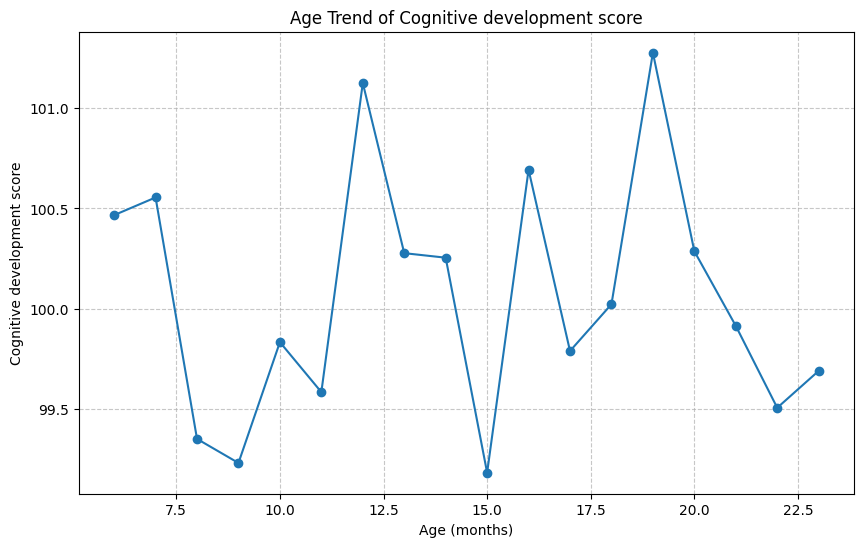

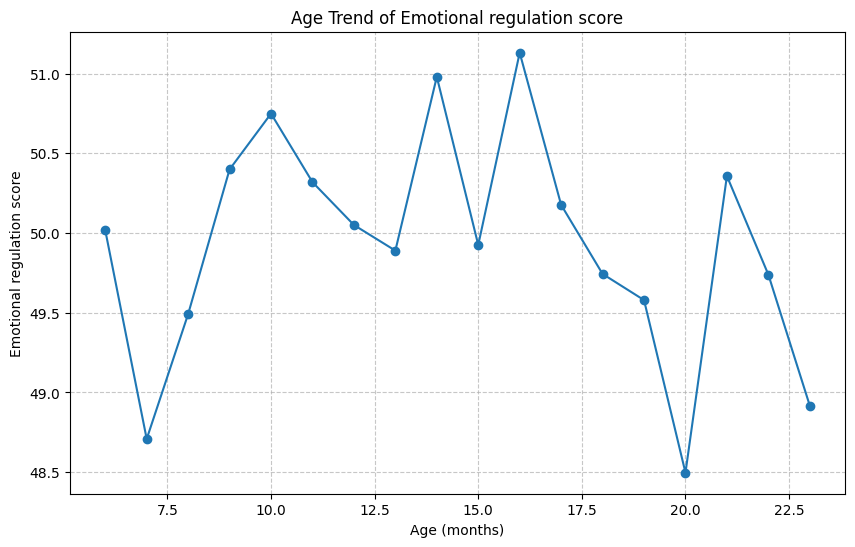

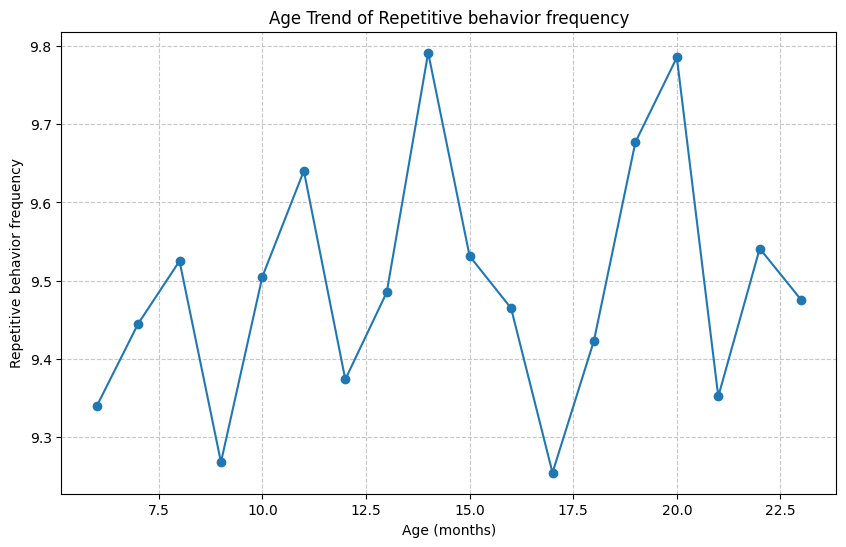

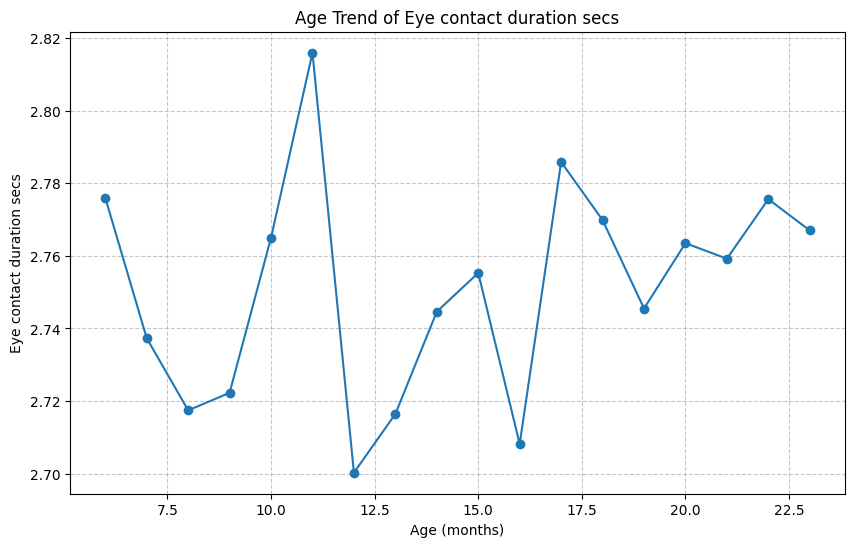

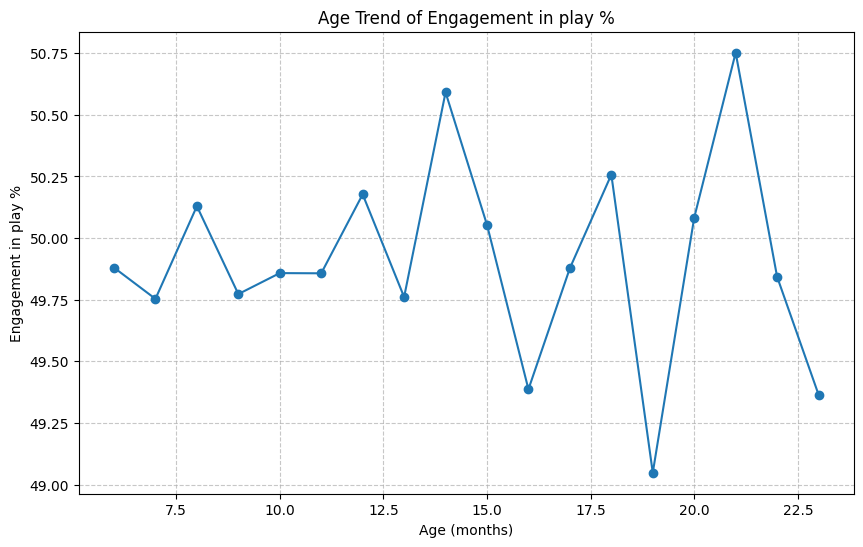

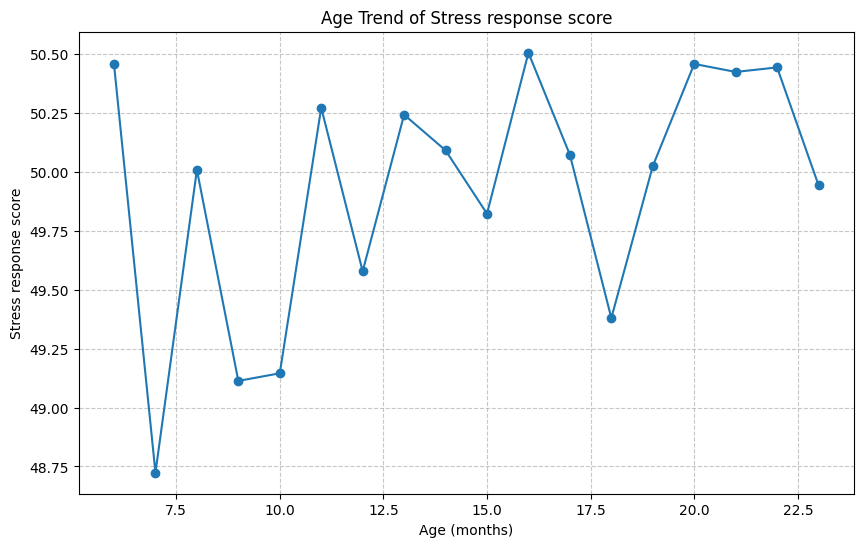

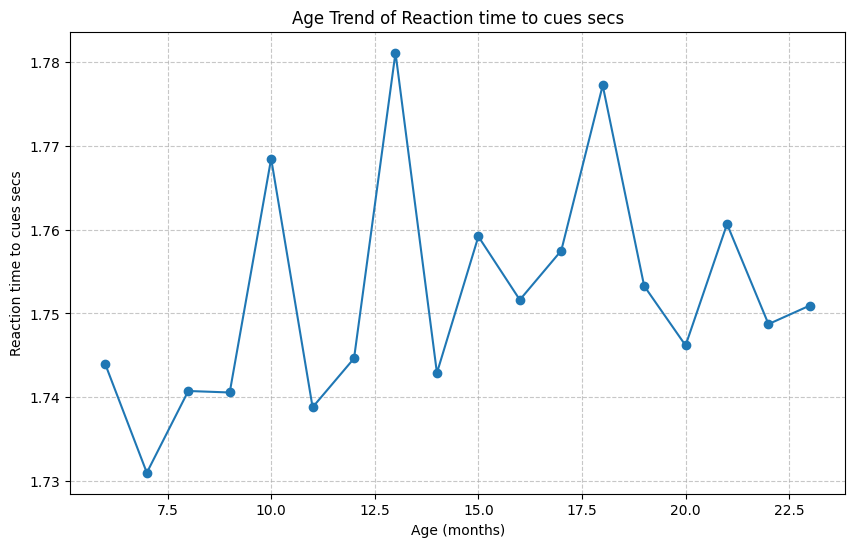

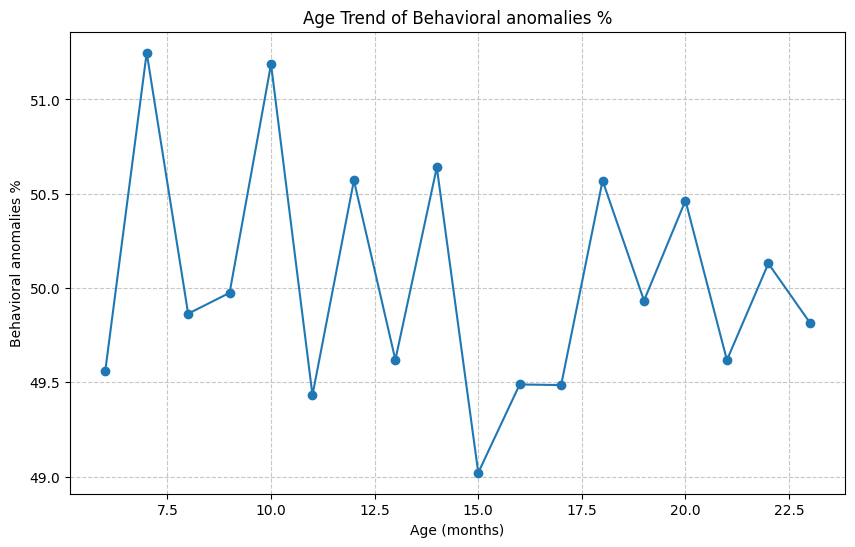

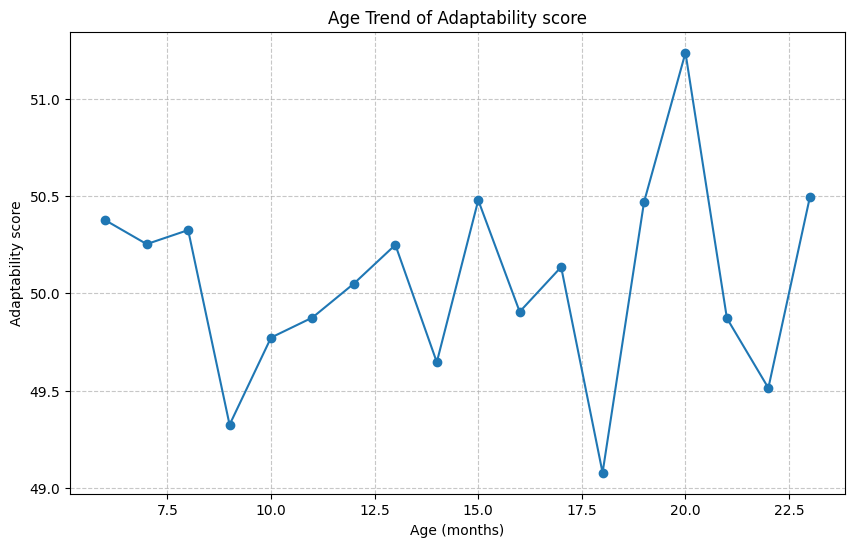

In [18]:
print("\nGenerating trend analysis plots...")
columns_to_plot = [
    'Gaze_pattern_on_faces_%', 'Joint_attention_%', 'Babbling_frequency_per_min',
    'Response_to_name_%', 'Heart_rate_variability_ms', 'Sleep_duration_hrs_per_night',
    'Social_engagement_%', 'Parent_interaction_score', 'Fine_motor_skills_score',
    'Gross_motor_skills_score', 'Eye_tracking_latency_ms', 'Response_to_visual_stimuli_%',
    'Language_comprehension_score', 'Cognitive_development_score', 'Emotional_regulation_score',
    'Repetitive_behavior_frequency', 'Eye_contact_duration_secs', 'Engagement_in_play_%',
    'Stress_response_score', 'Reaction_time_to_cues_secs', 'Behavioral_anomalies_%',
    'Adaptability_score'
]

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df.groupby('Age_in_months')[col].mean(), marker='o')
    plt.title(f'Age Trend of {col.replace("_", " ")}')
    plt.xlabel('Age (months)')
    plt.ylabel(col.replace("_", " "))
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()

In [19]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [20]:
if missing_values.sum() > 0:
    # For numerical features, fill with median
    for col in numerical_features:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())
    
    # For categorical features, fill with mode
    for col in categorical_features:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])


label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
    print(f"Encoded {col} values:", dict(zip(label_encoders[col].classes_, 
                                           label_encoders[col].transform(label_encoders[col].classes_))))

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

X = df[numerical_features + categorical_features]
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Encoded Sensory_sensitivity_level values: {'High': np.int64(0), 'Low': np.int64(1), 'Normal': np.int64(2)}
Encoded Auditory_sensitivity_level values: {'High': np.int64(0), 'Low': np.int64(1), 'Normal': np.int64(2)}
X_train shape: (40000, 27)
X_test shape: (10000, 27)
y_train shape: (40000,)
y_test shape: (10000,)


In [21]:
print("Before SMOTE:", pd.Series(y_train).value_counts(normalize=True))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", pd.Series(y_train_resampled).value_counts(normalize=True))

print(f"Training set (after SMOTE): {X_train_resampled.shape}")
print(f"Test set: {X_test.shape}")

print("Checking for any remaining missing values:", X_train_resampled.isnull().sum().sum())
print("Feature value ranges:")
for col in X_train_resampled.columns:
    print(f"{col}: {X_train_resampled[col].min():.2f} to {X_train_resampled[col].max():.2f}")

feature_names = X_train_resampled.columns.tolist()
print("\nPreprocessed feature names:", feature_names)

Before SMOTE: Parental_concern_flag
0    0.801775
1    0.198225
Name: proportion, dtype: float64
After SMOTE: Parental_concern_flag
0    0.5
1    0.5
Name: proportion, dtype: float64
Training set (after SMOTE): (64142, 27)
Test set: (10000, 27)
Checking for any remaining missing values: 0
Feature value ranges:
Age_in_months: -1.64 to 1.64
Gaze_pattern_on_faces_%: -1.73 to 1.73
Joint_attention_%: -1.74 to 1.73
Babbling_frequency_per_min: -1.73 to 1.72
Response_to_name_%: -1.73 to 1.74
Heart_rate_variability_ms: -1.73 to 1.72
Sleep_duration_hrs_per_night: -1.74 to 1.74
Social_engagement_%: -1.73 to 1.73
Motor_milestone_delay_months: -1.46 to 1.47
Parent_interaction_score: -1.73 to 1.73
Fine_motor_skills_score: -1.73 to 1.74
Gross_motor_skills_score: -1.74 to 1.73
Eye_tracking_latency_ms: -1.74 to 1.73
Response_to_visual_stimuli_%: -1.73 to 1.73
Language_comprehension_score: -1.73 to 1.74
Speech_delay_months: -1.59 to 1.59
Cognitive_development_score: -1.74 to 1.73
Emotional_regulation_sc

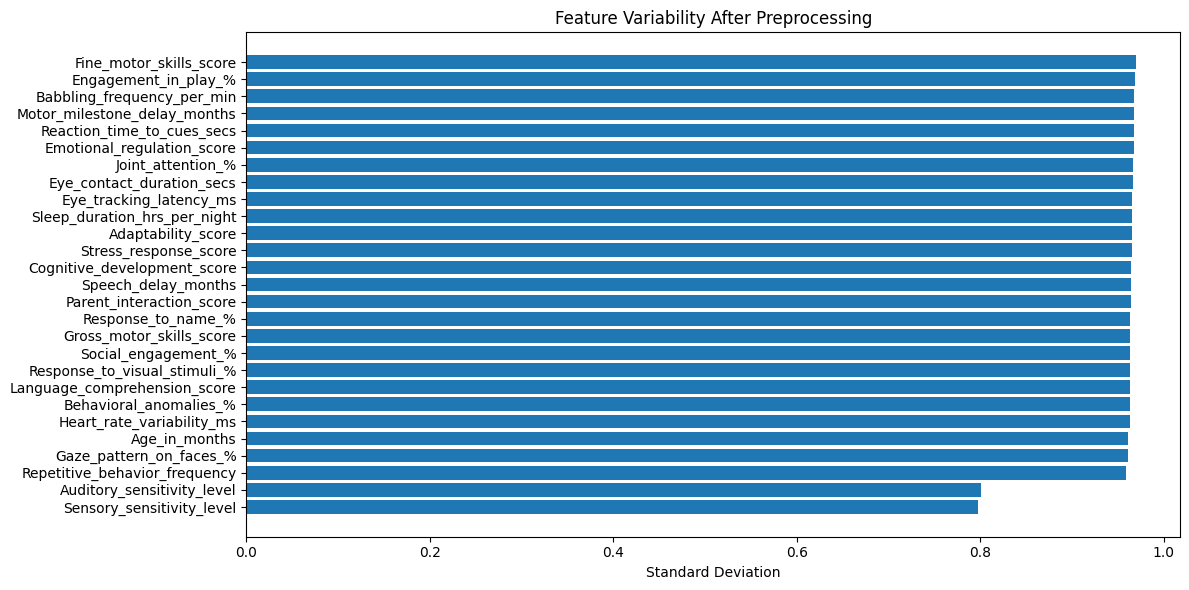

In [22]:
# Optional: Create a preprocessed feature importance plot
plt.figure(figsize=(12, 6))
feature_std = X_train_resampled.std()
feature_std_sorted = feature_std.sort_values(ascending=True)

plt.barh(range(len(feature_std_sorted)), feature_std_sorted)
plt.yticks(range(len(feature_std_sorted)), feature_std_sorted.index)
plt.xlabel('Standard Deviation')
plt.title('Feature Variability After Preprocessing')
plt.tight_layout()
plt.show()


# Save preprocessed data info for next steps
preprocessing_info = {
    'feature_names': feature_names,
    'label_encoders': label_encoders,
    'scaler': scaler,
    'X_train_shape': X_train_resampled.shape,
    'X_test_shape': X_test.shape
}

In [ ]:
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

# KNN parameters
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

def train_and_evaluate_model(model, params, X_train, y_train, X_test, y_test, model_name):
    """
    Train model using GridSearchCV and evaluate performance
    """
    print(f"\nTraining {model_name}...")
    

    start_time = time.time()
    

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    results = {
        'model_name': model_name,
        'best_params': best_params,
        'training_time': training_time,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'best_model': best_model
    }
    
    return results, y_pred_proba

print("\nTraining Logistic Regression model...")
log_reg = LogisticRegression(random_state=42)
log_reg_results, log_reg_proba = train_and_evaluate_model(
    log_reg, 
    log_reg_params,
    X_train_resampled,
    y_train_resampled,
    X_test,
    y_test,
    "Logistic Regression"
)


print("\nTraining KNN model...")
knn = KNeighborsClassifier()
knn_results, knn_proba = train_and_evaluate_model(
    knn,
    knn_params,
    X_train_resampled,
    y_train_resampled,
    X_test,
    y_test,
    "KNN"
)

print("\nDetailed Model Results:")
for results in [log_reg_results, knn_results]:
    print(f"\n{results['model_name']} Results:")
    print(f"Best Parameters: {results['best_params']}")
    print(f"Training Time: {results['training_time']:.2f} seconds")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1 Score: {results['f1']:.4f}")
    print(f"ROC AUC: {results['roc_auc']:.4f}")

plt.figure(figsize=(10, 6))

fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_proba)
plt.plot(fpr_log, tpr_log, 
         label=f'Logistic Regression (AUC = {log_reg_results["roc_auc"]:.3f})')

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
plt.plot(fpr_knn, tpr_knn, 
         label=f'KNN (AUC = {knn_results["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Base Models')
plt.legend()
plt.grid(True)
plt.show()

if hasattr(log_reg_results['best_model'], 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': abs(log_reg_results['best_model'].coef_[0])
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.barh(range(len(feature_importance)), feature_importance['Importance'])
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Absolute Coefficient Value')
    plt.title('Feature Importance in Logistic Regression')
    plt.tight_layout()
    plt.show()

base_models = {
    'logistic_regression': {
        'model': log_reg_results['best_model'],
        'results': log_reg_results
    },
    'knn': {
        'model': knn_results['best_model'],
        'results': knn_results
    }
}

print("\nBase models training and evaluation completed!")


Training Logistic Regression model...

Training Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Training KNN model...

Training KNN...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


Starting Random Forest model training and evaluation...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Random Forest Results:
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training Time: 11.05 seconds

Performance Metrics:
Accuracy: 0.7110
Precision: 0.1895
Recall: 0.1495
F1 Score: 0.1671
ROC AUC: 0.4869


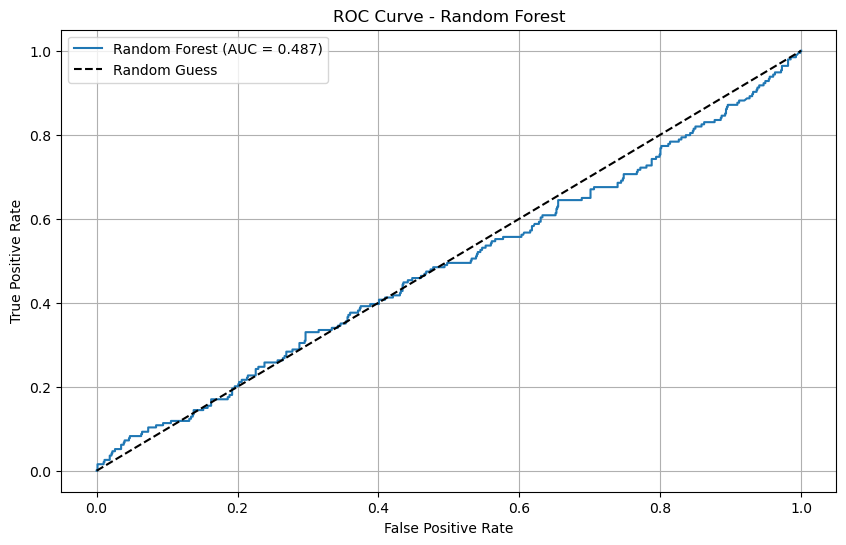

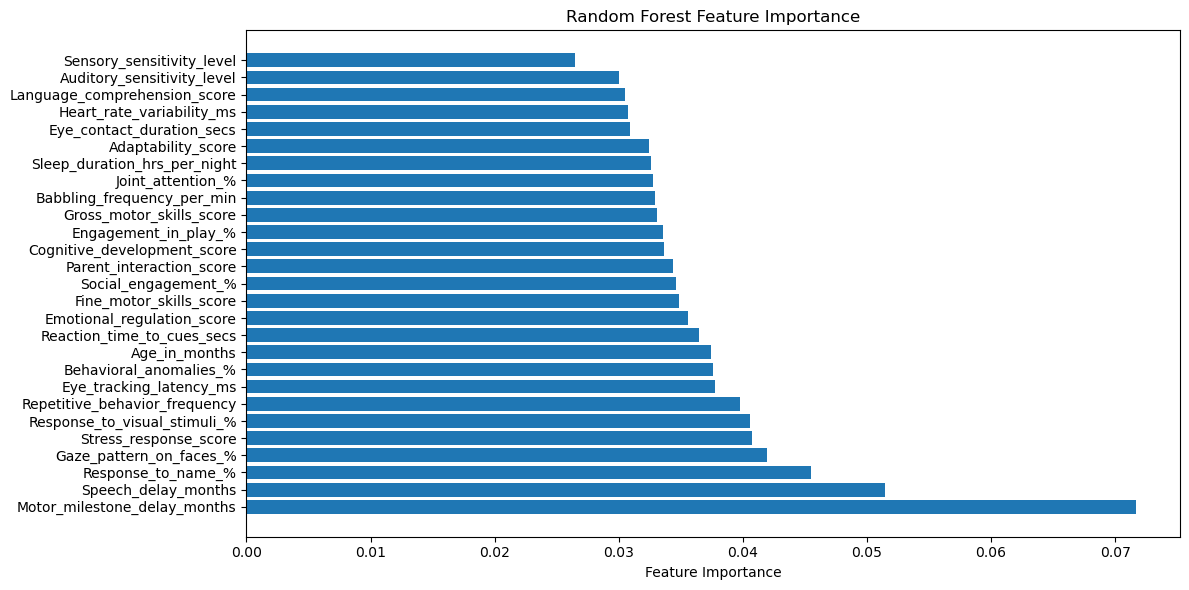


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       806
           1       0.19      0.15      0.17       194

    accuracy                           0.71      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.69      0.71      0.70      1000


Random Forest model training and evaluation completed!


In [ ]:
rf_params = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

start_time = time.time()
rf_cv.fit(X_train_resampled, y_train_resampled)
rf_training_time = time.time() - start_time

rf_pred = rf_cv.predict(X_test)
rf_pred_proba = rf_cv.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print("\nRandom Forest Results:")
print(f"Best Parameters: {rf_cv.best_params_}")
print(f"Training Time: {rf_training_time:.2f} seconds")
print("\nPerformance Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"ROC AUC: {rf_auc:.4f}")

plt.figure(figsize=(10, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_cv.best_estimator_.feature_importances_
})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(rf_feature_importance)), rf_feature_importance['Importance'])
plt.yticks(range(len(rf_feature_importance)), rf_feature_importance['Feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

print("\nDetailed Classification Report:")
print(classification_report(y_test, rf_pred))

rf_results = {
    'model': rf_cv.best_estimator_,
    'best_params': rf_cv.best_params_,
    'training_time': rf_training_time,
    'metrics': {
        'accuracy': rf_accuracy,
        'precision': rf_precision,
        'recall': rf_recall,
        'f1': rf_f1,
        'auc': rf_auc
    },
    'feature_importance': rf_feature_importance
}

print("\nRandom Forest model training and evaluation completed!")

Starting AdaBoost model training and evaluation...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

AdaBoost Results:
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50}
Training Time: 4.95 seconds

Performance Metrics:
Accuracy: 0.6340
Precision: 0.2095
Recall: 0.3196
F1 Score: 0.2531
ROC AUC: 0.5110


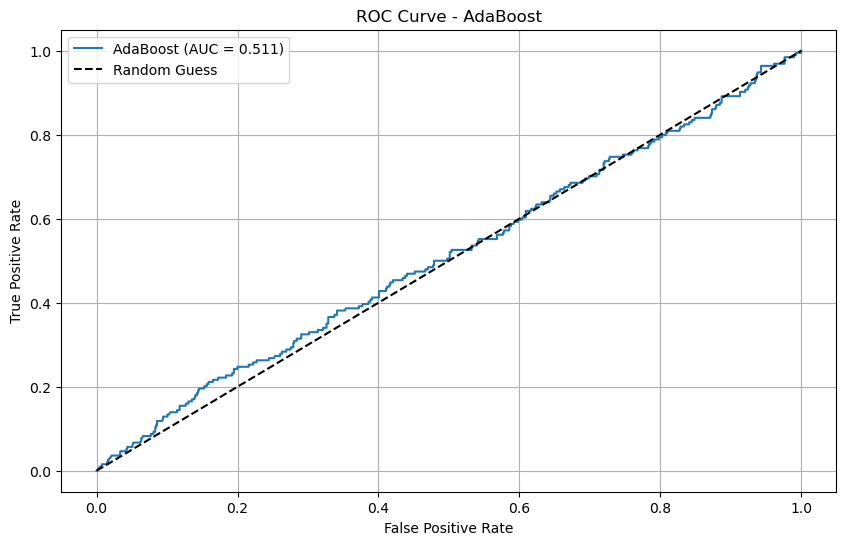

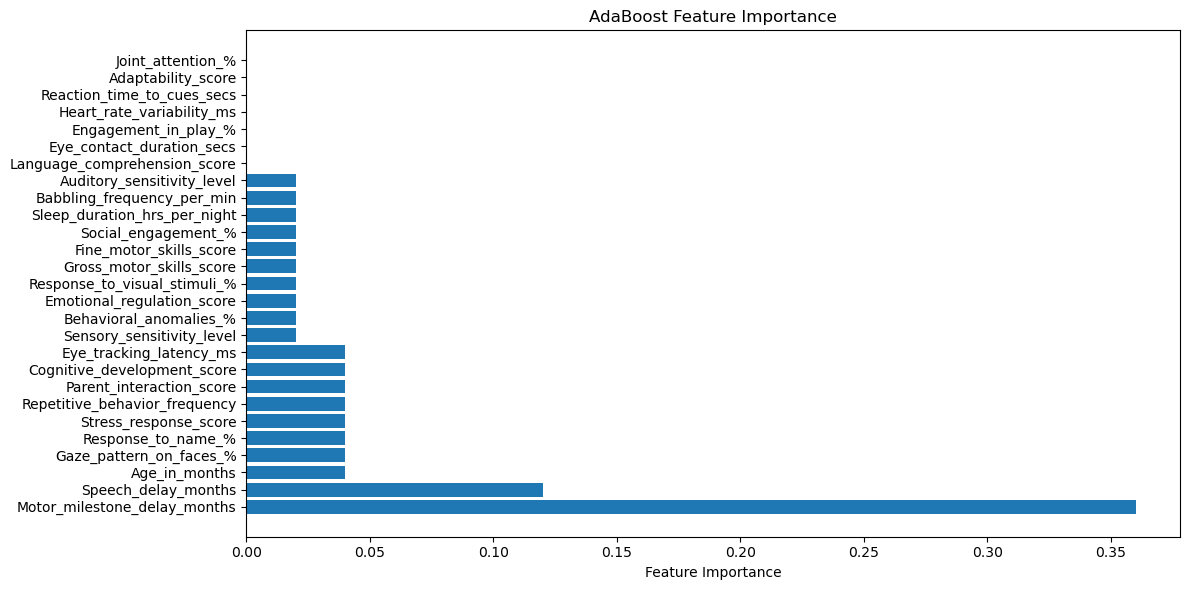


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       806
           1       0.21      0.32      0.25       194

    accuracy                           0.63      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.70      0.63      0.66      1000


Weak Learners Analysis:
Number of weak learners: 50


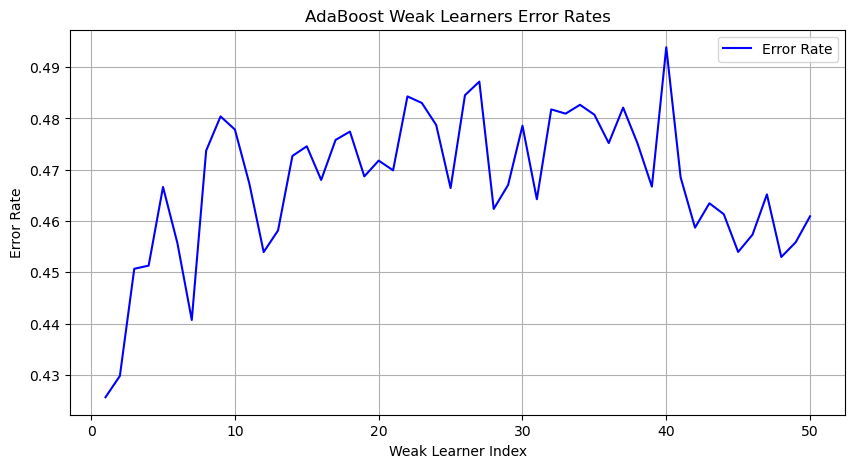

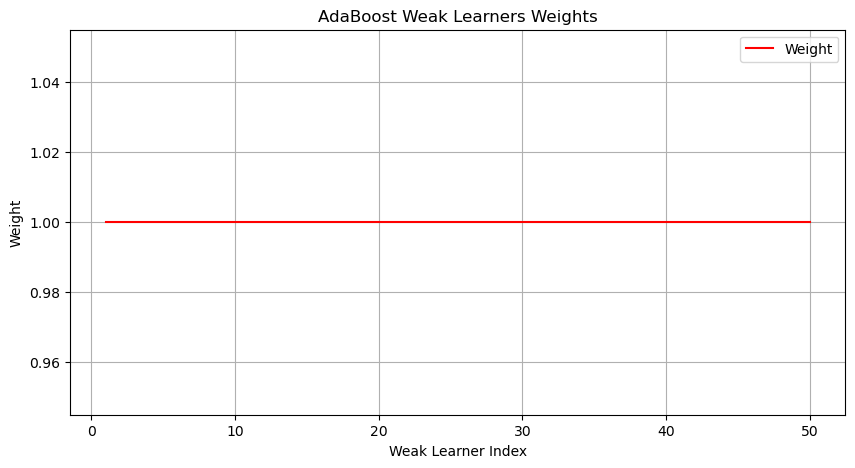


AdaBoost model training and evaluation completed!


In [ ]:
ada_params = {
    'n_estimators': [50],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Train AdaBoost model
ada = AdaBoostClassifier(random_state=42)
ada_cv = GridSearchCV(ada, ada_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)


start_time = time.time()
ada_cv.fit(X_train_resampled, y_train_resampled)
ada_training_time = time.time() - start_time

ada_pred = ada_cv.predict(X_test)
ada_pred_proba = ada_cv.predict_proba(X_test)[:, 1]

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
ada_auc = roc_auc_score(y_test, ada_pred_proba)

print("\nAdaBoost Results:")
print(f"Best Parameters: {ada_cv.best_params_}")
print(f"Training Time: {ada_training_time:.2f} seconds")
print("\nPerformance Metrics:")
print(f"Accuracy: {ada_accuracy:.4f}")
print(f"Precision: {ada_precision:.4f}")
print(f"Recall: {ada_recall:.4f}")
print(f"F1 Score: {ada_f1:.4f}")
print(f"ROC AUC: {ada_auc:.4f}")


plt.figure(figsize=(10, 6))
fpr_ada, tpr_ada, _ = roc_curve(y_test, ada_pred_proba)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {ada_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend()
plt.grid(True)
plt.show()

ada_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': ada_cv.best_estimator_.feature_importances_
})
ada_feature_importance = ada_feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(ada_feature_importance)), ada_feature_importance['Importance'])
plt.yticks(range(len(ada_feature_importance)), ada_feature_importance['Feature'])
plt.xlabel('Feature Importance')
plt.title('AdaBoost Feature Importance')
plt.tight_layout()
plt.show()

print(classification_report(y_test, ada_pred))

weak_learners = ada_cv.best_estimator_.estimators_
n_estimators = len(weak_learners)
print(f"Number of weak learners: {n_estimators}")

estimator_errors = ada_cv.best_estimator_.estimator_errors_
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_estimators + 1), estimator_errors, 'b-', label='Error Rate')
plt.xlabel('Weak Learner Index')
plt.ylabel('Error Rate')
plt.title('AdaBoost Weak Learners Error Rates')
plt.grid(True)
plt.legend()
plt.show()

estimator_weights = ada_cv.best_estimator_.estimator_weights_
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_estimators + 1), estimator_weights, 'r-', label='Weight')
plt.xlabel('Weak Learner Index')
plt.ylabel('Weight')
plt.title('AdaBoost Weak Learners Weights')
plt.grid(True)
plt.legend()
plt.show()

ada_results = {
    'model': ada_cv.best_estimator_,
    'best_params': ada_cv.best_params_,
    'training_time': ada_training_time,
    'metrics': {
        'accuracy': ada_accuracy,
        'precision': ada_precision,
        'recall': ada_recall,
        'f1': ada_f1,
        'auc': ada_auc
    },
    'feature_importance': ada_feature_importance,
    'weak_learners_info': {
        'n_estimators': n_estimators,
        'error_rates': estimator_errors,
        'weights': estimator_weights
    }
}

Starting Voting Classifier training and evaluation...

Voting Classifier Results:
Training Time: 2.99 seconds

Performance Metrics:
Accuracy: 0.7100
Precision: 0.1883
Recall: 0.1495
F1 Score: 0.1667
ROC AUC: 0.4871


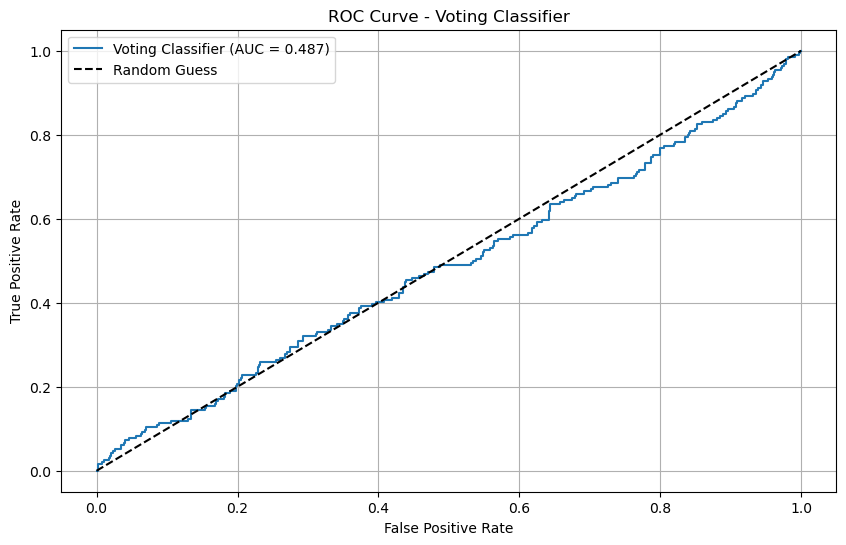


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       806
           1       0.19      0.15      0.17       194

    accuracy                           0.71      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.69      0.71      0.70      1000



In [ ]:

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_results['model']),
        ('ada', ada_results['model']),
    
    ],
    voting='soft'  
)

start_time = time.time()
voting_clf.fit(X_train_resampled, y_train_resampled)
voting_training_time = time.time() - start_time

voting_pred = voting_clf.predict(X_test)
voting_pred_proba = voting_clf.predict_proba(X_test)[:, 1]

voting_accuracy = accuracy_score(y_test, voting_pred)
voting_precision = precision_score(y_test, voting_pred)
voting_recall = recall_score(y_test, voting_pred)
voting_f1 = f1_score(y_test, voting_pred)
voting_auc = roc_auc_score(y_test, voting_pred_proba)

print("\nVoting Classifier Results:")
print(f"Training Time: {voting_training_time:.2f} seconds")
print("\nPerformance Metrics:")
print(f"Accuracy: {voting_accuracy:.4f}")
print(f"Precision: {voting_precision:.4f}")
print(f"Recall: {voting_recall:.4f}")
print(f"F1 Score: {voting_f1:.4f}")
print(f"ROC AUC: {voting_auc:.4f}")

plt.figure(figsize=(10, 6))
fpr_voting, tpr_voting, _ = roc_curve(y_test, voting_pred_proba)
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {voting_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier')
plt.legend()
plt.grid(True)
plt.show()

print("\nDetailed Classification Report:")
print(classification_report(y_test, voting_pred))


In [ ]:
all_models = {
    'Random Forest': rf_results,
    'AdaBoost': ada_results,

}


performance_metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
performance_comparison = pd.DataFrame(columns=['Model'] + performance_metrics + ['Training Time'])

for model_name, results in all_models.items():
    metrics = results['metrics']
    performance_comparison = performance_comparison.append({
        'Model': model_name,
        'accuracy': metrics['accuracy'],
        'precision': metrics['precision'],
        'recall': metrics['recall'],
        'f1': metrics['f1'],
        'auc': metrics['auc'],
        'Training Time': results['training_time']
    }, ignore_index=True)


print("\nComprehensive Model Performance Comparison:")
print(performance_comparison.round(4))

Starting final model comparison and analysis...

Comprehensive Model Performance Comparison:
           Model  accuracy  precision  recall      f1     auc  Training Time
0  Random Forest     0.711     0.1895  0.1495  0.1671  0.4869        11.0452
1       AdaBoost     0.634     0.2095  0.3196  0.2531  0.5110         4.9538


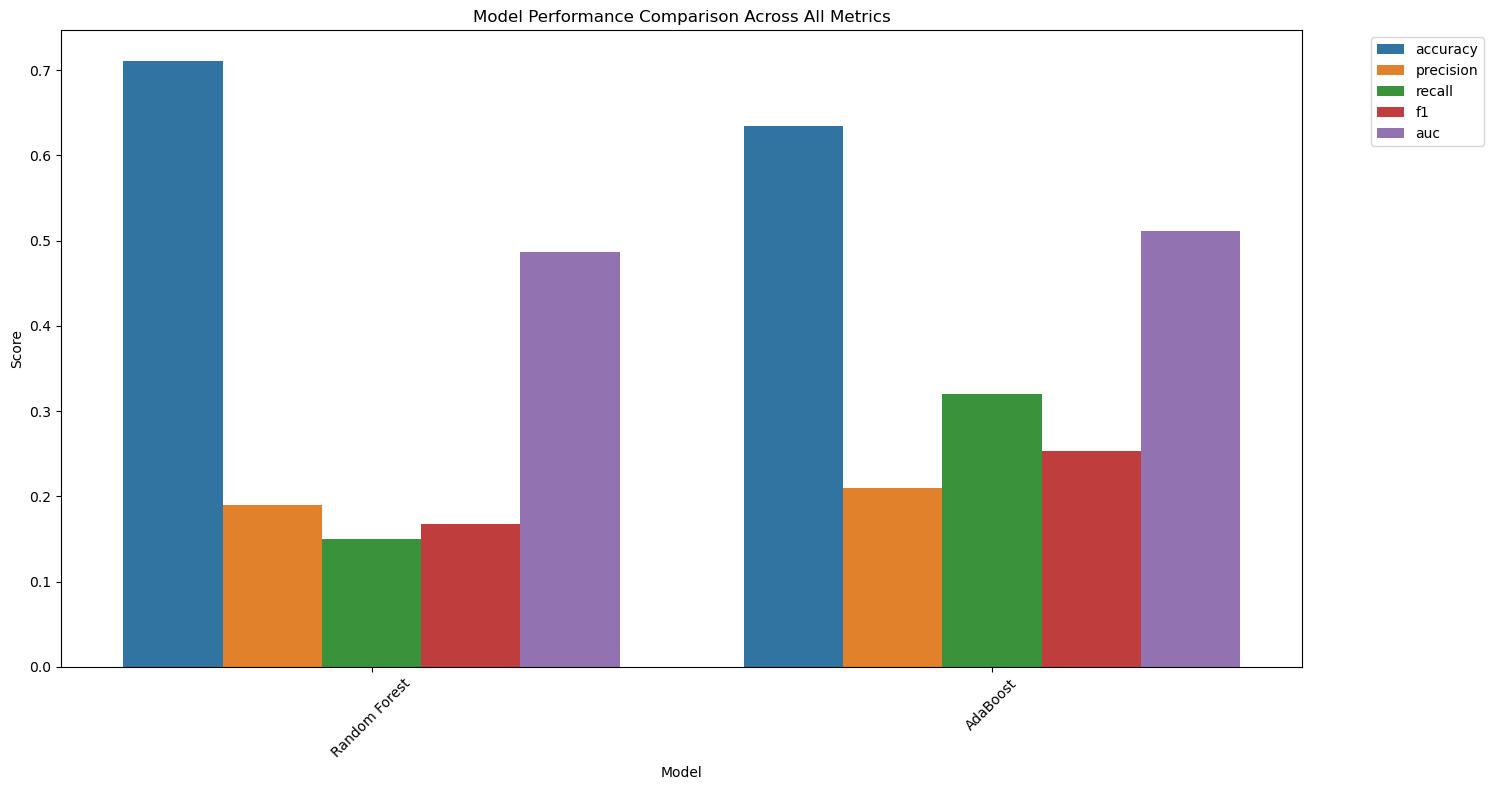

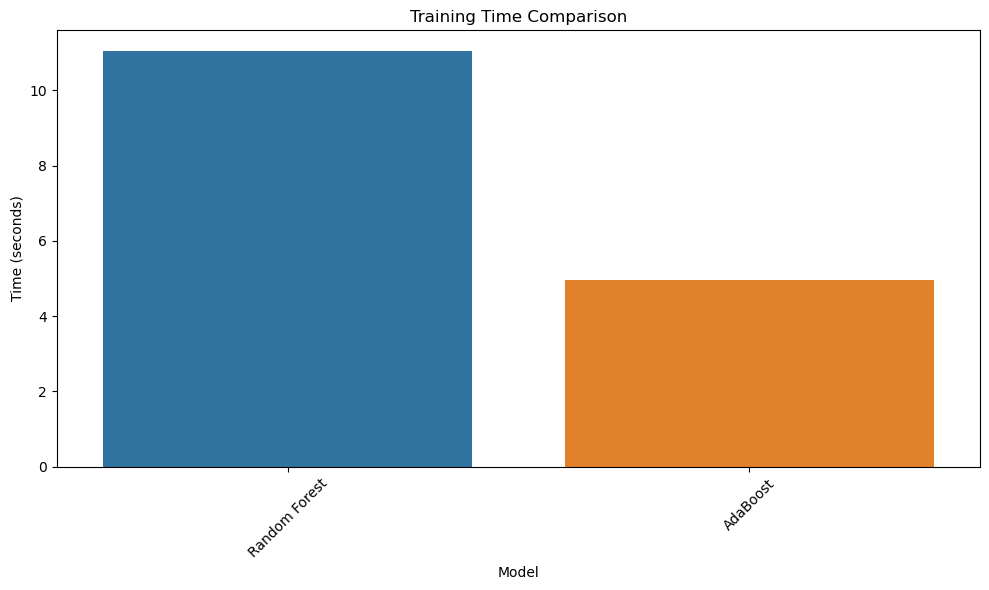

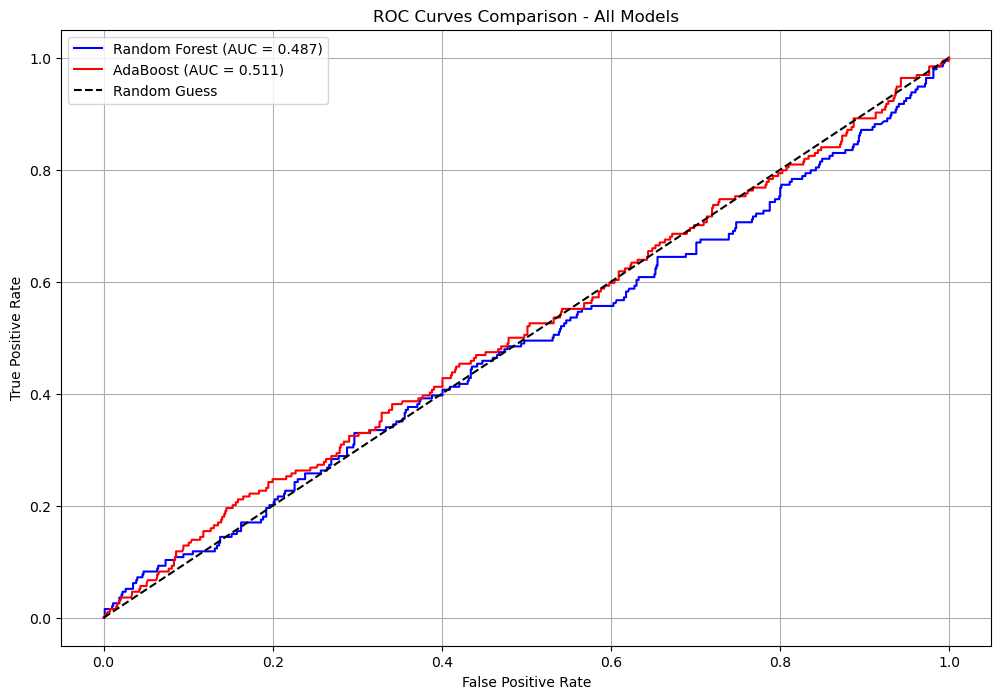

In [ ]:
plt.figure(figsize=(15, 8))
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'auc']
performance_melted = pd.melt(performance_comparison, 
                           id_vars=['Model'], 
                           value_vars=metrics_to_plot,
                           var_name='Metric', 
                           value_name='Score')

sns.barplot(x='Model', y='Score', hue='Metric', data=performance_melted)
plt.title('Model Performance Comparison Across All Metrics')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time', data=performance_comparison)
plt.title('Training Time Comparison')
plt.xticks(rotation=45)
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
model_colors = {'Random Forest': 'blue', 'AdaBoost': 'red', 
                'Bagging': 'green', 'Voting': 'purple'}

for model_name, results in all_models.items():
    if model_name == 'Random Forest':
        plt.plot(fpr_rf, tpr_rf, color=model_colors[model_name],
                label=f'{model_name} (AUC = {results["metrics"]["auc"]:.3f})')
    elif model_name == 'AdaBoost':
        plt.plot(fpr_ada, tpr_ada, color=model_colors[model_name],
                label=f'{model_name} (AUC = {results["metrics"]["auc"]:.3f})')
    else:  # Voting
        plt.plot(fpr_voting, tpr_voting, color=model_colors[model_name],
                label=f'{model_name} (AUC = {results["metrics"]["auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison - All Models')
plt.legend()
plt.grid(True)
plt.show()
